In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Create a graph from a place

In [2]:
# Using osmnx.graph_from_address to turn textual description of place to networkx graph of that place map
place_name = "university of toronto"
graph = ox.graph_from_address(place_name)
# graph = ox.graph_from_place(place_name, network_type='drive') # retrieve drive netowrk only

## Visualizing the graph

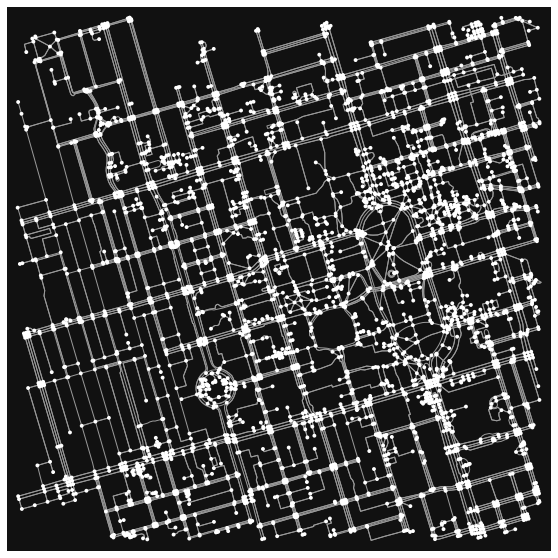

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [3]:
# Visualize that graph using matplotlib
ox.plot_graph(graph, figsize=(10,10))

In [4]:
# Let's prune the graph a bit by changing the width of our scope
graph = ox.graph_from_address("university of toronto", dist = 300)

In [5]:
# Visualize graph nodes with folium
ox.folium.plot_graph_folium(graph)

In [6]:
# add markers for points of interest
import folium

m = folium.Map(location=[43.663774, -79.395981], tiles="OpenStreetMap", zoom_start=16)

center=(43.662643, -79.395689) # UofT main building
source_point = (43.664527, -79.392442)  # King Edward VII Equestrian Statue
destination_point = (43.659659, -79.397669) # Bahen Centre for Information Technology at UofT


folium.Marker(location = [center[0], center[1]], popup = 'UofT main building', icon=folium.Icon(color='blue', icon='star', prefix='fa')).add_to(m)

folium.Marker(location = [source_point[0],source_point[1]], popup = 'King Edward VII Equestrian Statue', icon = folium.Icon(color='red', icon='home', prefix='fa')
).add_to(m)

folium.Marker(location = [destination_point[0],destination_point[1]], popup = 'Bahen Centre for Information Technology at UofT', icon = folium.Icon(color='green', icon='flag', prefix='fa')
).add_to(m)

m

In [7]:
center[0]

43.662643

In [8]:
# plotting map using ipyleaflet
from ipyleaflet import *
center=(43.662643, -79.395689) # UofT main building
source_point = (43.664527, -79.392442)  # King Edward VII Equestrian Statue
destination_point = (43.659659, -79.397669) # Bahen Centre for Information Technology at UofT

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=False)

# King Edward VII Equestrian Statue
marker1 = Marker(name='marker1', location=source_point, icon=Icon(icon_url='https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-red.png', icon_size=[25, 41], icon_anchor=[12, 41]))

# Bahen Centre for Information Technology
marker2 = Marker(name='marker2', location=destination_point, icon=Icon(icon_url='https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-yellow.png', icon_size=[25, 41], icon_anchor=[12, 41]))

# for more icons: https://ipyleaflet.readthedocs.io/en/latest/api_reference/awesome_icon.html

m.add_layer(marker1)
m.add_layer(marker2)

control = LayersControl(position='topright')
m.add_control(control)
m.add_layer(marker);
m

Map(center=[43.662643, -79.395689], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Extracting graph information

In [9]:
# type of the generated graph
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [10]:
 # extract the nodes and edges from the graph as GeoDataFrames
nodes, edges = ox.graph_to_gdfs(graph)

In [11]:
nodes.head(5)

y          x       osmid highway  \
6391301132  43.662454 -79.399407  6391301132     NaN   
1258707987  43.662295 -79.395994  1258707987     NaN   
1258707990  43.661657 -79.396219  1258707990     NaN   
389678111   43.662654 -79.394529   389678111     NaN   
389678112   43.662613 -79.394646   389678112     NaN   

                              geometry  
6391301132  POINT (-79.39941 43.66245)  
1258707987  POINT (-79.39599 43.66229)  
1258707990  POINT (-79.39622 43.66166)  
389678111   POINT (-79.39453 43.66265)  
389678112   POINT (-79.39465 43.66261)

In [12]:
edges.head(5)

osmid  \
0                                          234732970   
1                                          682466783   
2  [234732970, 396822863, 366318543, 639850036, 2...   
3                                           34011873   
4                                          204343740   

                      highway      access  oneway   length  \
0                     footway  permissive   False   10.945   
1                     footway         NaN   False    7.410   
2  [corridor, footway, steps]  permissive   False  111.947   
3                     footway         NaN   False   14.600   
4                     footway  permissive   False   13.855   

                                            geometry lanes name maxspeed  \
0  LINESTRING (-79.39941 43.66245, -79.39954 43.6...   NaN  NaN      NaN   
1  LINESTRING (-79.39941 43.66245, -79.39943 43.6...   NaN  NaN      NaN   
2  LINESTRING (-79.39941 43.66245, -79.39935 43.6...   NaN  NaN      NaN   
3  LINESTRING (-79.39599 43.66229, -79.39582 43.6...   NaN  NaN      NaN   
4  LINESTRING (-79.39599 43.66229, -79.39604 43.6...   NaN  NaN      NaN   

  service tunnel           u           v  key  
0     NaN    NaN  6391301132  2428750571    0  
1     NaN    NaN  6391301132  6391312709    0  
2     NaN    NaN  6391301132  6028561930    0  
3     NaN    NaN  1258707987  7311083158    0  
4     NaN    NaN  1258707987  2143485199    0

In [13]:
# Retrieve only edges from the graph 
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [14]:
# rendering the 2nd node 
list(graph.nodes(data=True))[1]

(1258707987, {'y': 43.6622948, 'x': -79.3959935, 'osmid': 1258707987})

In [15]:
# rendering the 1std edge
list(graph.edges(data=True))[1]

(6391301132,
 6391312709,
 {'osmid': 682466783, 'highway': 'footway', 'oneway': False, 'length': 7.41})

In [16]:
# get road types
print(edges['highway'].value_counts())

footway                       836
service                       106
residential                    62
path                           60
tertiary                       54
[footway, steps]               18
unclassified                   17
pedestrian                     10
steps                           4
[service, footway]              4
[path, steps]                   4
[corridor, footway, steps]      2
secondary                       2
[footway, path]                 2
[service, path, steps]          2
Name: highway, dtype: int64


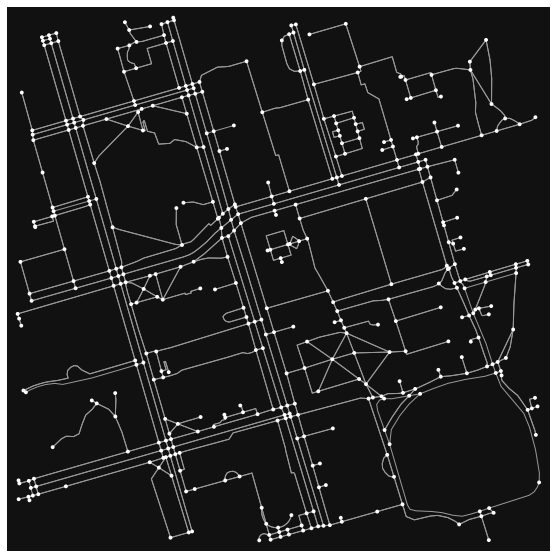

In [17]:
# Converting node and edge GeoDataFrames to a MultiDiGraph.
graph_2=ox.graph_from_gdfs(nodes, edges)
ig2, ax2 = ox.plot_graph(graph_2,figsize=(10,10))

In [18]:
# Calculate network statistics
stats = ox.basic_stats(graph, circuity_dist='euclidean')
stats

{'n': 422,
 'm': 1183,
 'k_avg': 5.606635071090047,
 'intersection_count': 366,
 'streets_per_node_avg': 3.059241706161137,
 'streets_per_node_counts': {0: 0, 1: 56, 2: 0, 3: 234, 4: 128, 5: 3, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13270142180094788,
  2: 0.0,
  3: 0.5545023696682464,
  4: 0.3033175355450237,
  5: 0.0071090047393364926,
  6: 0.002369668246445498},
 'edge_length_total': 33526.35599999993,
 'edge_length_avg': 28.340114961961053,
 'street_length_total': 17284.822999999993,
 'street_length_avg': 28.664714759535645,
 'street_segments_count': 603,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 95994.84522129643,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

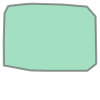

In [19]:
# Get the Convex Hull of the network
convex_hull = edges.unary_union.convex_hull
# Show output
convex_hull

In [20]:
#extended statistics for the network using the Convex Hull

# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph, area=area)
extended_stats = ox.extended_stats(graph, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                    422
m                                                                                   1183
k_avg                                                                            5.60664
intersection_count                                                                   366
streets_per_node_avg                                                             3.05924
streets_per_node_counts                  {0: 0, 1: 56, 2: 0, 3: 234, 4: 128, 5: 3, 6: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.13270142180094788, 2: 0.0, 3: 0....
edge_length_total                                                                33526.4
edge_length_avg                                                                  28.3401
street_length_total                                                              17284.8
street_length_avg                                                                28.6647
street_segments_count

## Projection

In [21]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
# # Reproject to Mercator
# edges_proj = edges_proj.to_crs(epsg=3857) 
# edges_proj.crs

## Shortest path analysis

In [23]:
# getting the nearest nodes to the locations 
orig_node = ox.get_nearest_node(graph, source_point) 
target_node = ox.get_nearest_node(graph, destination_point)

# Render the closest node id to origin and destination points 
target_node, target_node

(239055725, 239055725)

In [24]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes.loc[orig_node]
t_closest = nodes.loc[target_node]

In [25]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes.crs)
od_nodes.head()

y          x      osmid  highway  \
390545921  43.665132 -79.394109  390545921      NaN   
239055725  43.660783 -79.397878  239055725      NaN   

                             geometry  
390545921  POINT (-79.39411 43.66513)  
239055725  POINT (-79.39788 43.66078)

In [26]:
# Calculate the shortest path
route = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)

[390545921, 60654129, 60654119, 389678001, 389678002, 2143434369, 390550470, 127289393, 8277128565, 8277128566, 4920594801, 3996671922, 80927418, 7967019552, 127275360, 80927426, 2143468197, 2143468182, 55808564, 55808527, 130170945, 389677905, 389678182, 389677906, 50885141, 389678180, 1258706668, 2143436407, 1258706673, 2143402269, 2143402268, 1258706670, 239055725]


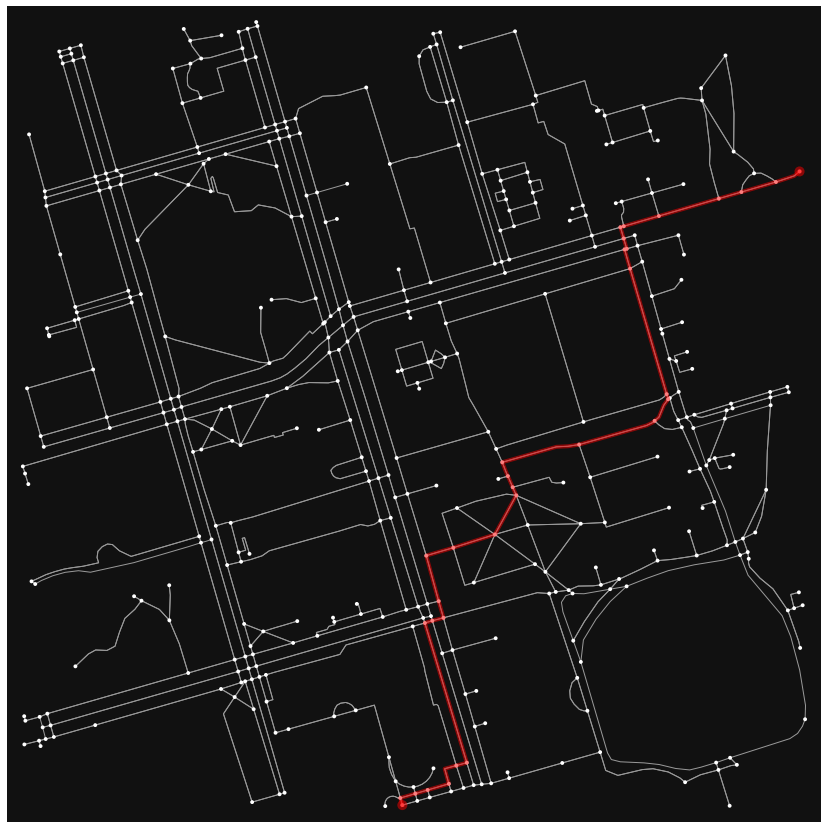

In [27]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph, route, figsize=(15,15))

In [28]:
# """Draw leaflet map based for the graph passed to the function
# with highlighting certain nodes with a marker. ipyleaflet rendering 
# can be a little slow when dealing with graphs with many node, in that 
# case when number of nodes > 1000, the function reverts to folium for rendering
# which is a plain black and white rendering of the map not like ipyleaflet
# Parameters
# ----------
# G: networkx graph returned by osmnx
# highlight: list of nodes to be marked on the leaflet map
# zoom: the initial zooming level for the rendered map
# Returns
# -------
# m: ipyleaflet/folium map for the osmnx graph with optional highlighted nodes
# """
import ipyleaflet as lf
def draw_route(G, route, zoom = 16):
    
    if len(G) >= 1000:
        print(f"The graph has {len(G)} which is a lot, we will use basic faster folium instead")
        m = ox.plot_route_folium(G = G, route = route)
        return m

    center_osmid = ox.stats.extended_stats(G,ecc=True)['center'][0]
    G_gdfs = ox.graph_to_gdfs(G)
    nodes_frame = G_gdfs[0]
    ways_frame = G_gdfs[1]
    center_node = nodes_frame.loc[center_osmid]
    location = (center_node['y'], center_node['x'])
    m = lf.Map(center = location, zoom = zoom)

    start_node = nodes_frame.loc[route[0]]
    end_node = nodes_frame.loc[route[len(route)-1]]

    start_xy = (start_node['y'], start_node['x'])
    end_xy = (end_node['y'], end_node['x'])
    marker = lf.Marker(location = start_xy, draggable = False)
    m.add_layer(marker)
    marker = lf.Marker(location = end_xy, draggable = False)
    m.add_layer(marker)

    for u, v in zip(route[0:], route[1:]):
        try:
            x, y = (ways_frame.query(f'u == {u} and v == {v}').to_dict('list')['geometry'])[0].coords.xy
        except:
            x, y = (ways_frame.query(f'u == {v} and v == {u}').to_dict('list')['geometry'])[0].coords.xy
        points = map(list, [*zip([*y],[*x])])
        ant_path = lf.AntPath(
            locations = [*points], 
            dash_array=[1, 10],
            delay=1000,
            color='red',
            pulse_color='black'
        )
        m.add_layer(ant_path)

    return m

In [29]:
draw_route(graph, route)

Map(center=[43.6631656, -79.3979318], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

## Retrieve buildings information

In [30]:
buildings = ox.footprints_from_place(place_name)
buildings_proj = buildings.to_crs(crs=edges.crs)

In [31]:
buildings_proj.head(5)

nodes addr:housenumber  \
7685383  [55808755, 340165033, 55808760, 55808764, 8504...              300   
7948423  [59227761, 2143460128, 3702927984, 2143460131,...              100   
7991747  [59817417, 59817411, 59817412, 3033737068, 303...              130   
8027952  [60006599, 1633499537, 1633499539, 60006598, 8...              113   
8027962  [60006651, 2143468180, 60006652, 60006653, 600...            73-75   

               addr:street     building building:colour building:material  \
7685383       Huron Street  residential          orange             brick   
7948423   St George Street   university             NaN               NaN   
7991747   St George Street   university            gray          concrete   
8027952  St. Joseph Street   university            gray          concrete   
8027962   St George Street   university             NaN               NaN   

                       college  \
7685383            New College   
7948423                    NaN   
7991747                    NaN   
8027952  St. Michael's College   
8027962     University College   

                                                     name  \
7685383                                      Wetmore Hall   
7948423                                 Sidney Smith Hall   
7991747                                   Robarts Library   
8027952                               J. M. Kelly Library   
8027962  Sir Daniel Wilson Residence (University College)   

                      operator  \
7685383  University of Toronto   
7948423  University of Toronto   
7991747  University of Toronto   
8027952  University of Toronto   
8027962  University of Toronto   

                                                  geometry  ... name:ne shop  \
7685383  POLYGON ((-79.39992 43.66229, -79.40009 43.662...  ...     NaN  NaN   
7948423  POLYGON ((-79.39948 43.66268, -79.39942 43.662...  ...     NaN  NaN   
7991747  POLYGON ((-79.39972 43.66396, -79.39972 43.664...  ...     NaN  NaN   
8027952  POLYGON ((-79.38912 43.66470, -79.38917 43.664...  ...     NaN  NaN   
8027962  POLYGON ((-79.39747 43.66297, -79.39755 43.662...  ...     NaN  NaN   

        source roof:levels wikimedia_commons building:min_level members  \
7685383    NaN         NaN               NaN                NaN     NaN   
7948423    NaN         NaN               NaN                NaN     NaN   
7991747    NaN         NaN               NaN                NaN     NaN   
8027952    NaN         NaN               NaN                NaN     NaN   
8027962    NaN         NaN               NaN                NaN     NaN   

        opening_hours type addr:full  
7685383           NaN  NaN       NaN  
7948423           NaN  NaN       NaN  
7991747           NaN  NaN       NaN  
8027952           NaN  NaN       NaN  
8027962           NaN  NaN       NaN  

[5 rows x 57 columns]

In [32]:
# Get the nodes along the shortest path
route_nodes = nodes.loc[route]
route_nodes

y          x       osmid          highway  \
390545921   43.665132 -79.394109   390545921              NaN   
60654129    43.665060 -79.394333    60654129              NaN   
60654119    43.664991 -79.394661    60654119              NaN   
389678001   43.664946 -79.394875   389678001              NaN   
389678002   43.664826 -79.395444   389678002              NaN   
2143434369  43.664756 -79.395777  2143434369              NaN   
390550470   43.664749 -79.395809   390550470              NaN   
127289393   43.664672 -79.395777   127289393  traffic_signals   
8277128565  43.664601 -79.395749  8277128565              NaN   
8277128566  43.664597 -79.395769  8277128566              NaN   
4920594801  43.664465 -79.395717  4920594801              NaN   
3996671922  43.663604 -79.395370  3996671922              NaN   
80927418    43.663569 -79.395356    80927418              NaN   
7967019552  43.663420 -79.395484  7967019552              NaN   
127275360   43.663258 -79.396201   127275360              NaN   
80927426    43.663136 -79.396929    80927426              NaN   
2143468197  43.663041 -79.396876  2143468197              NaN   
2143468182  43.662965 -79.396830  2143468182              NaN   
55808564    43.662909 -79.396797    55808564              NaN   
55808527    43.662641 -79.396999    55808527              NaN   
130170945   43.662550 -79.397394   130170945              NaN   
389677905   43.662495 -79.397650   389677905              NaN   
389678182   43.662183 -79.397533   389678182              NaN   
389677906   43.662069 -79.397487   389677906              NaN   
50885141    43.662049 -79.397593    50885141         crossing   
389678180   43.662033 -79.397663   389678180              NaN   
1258706668  43.661075 -79.397266  1258706668              NaN   
2143436407  43.661055 -79.397365  2143436407              NaN   
1258706673  43.660930 -79.397436  1258706673              NaN   
2143402269  43.660887 -79.397637  2143402269              NaN   
2143402268  43.660862 -79.397754  2143402268              NaN   
1258706670  43.660832 -79.397896  1258706670              NaN   
239055725   43.660783 -79.397878   239055725              NaN   

                              geometry  
390545921   POINT (-79.39411 43.66513)  
60654129    POINT (-79.39433 43.66506)  
60654119    POINT (-79.39466 43.66499)  
389678001   POINT (-79.39487 43.66495)  
389678002   POINT (-79.39544 43.66483)  
2143434369  POINT (-79.39578 43.66476)  
390550470   POINT (-79.39581 43.66475)  
127289393   POINT (-79.39578 43.66467)  
8277128565  POINT (-79.39575 43.66460)  
8277128566  POINT (-79.39577 43.66460)  
4920594801  POINT (-79.39572 43.66447)  
3996671922  POINT (-79.39537 43.66360)  
80927418    POINT (-79.39536 43.66357)  
7967019552  POINT (-79.39548 43.66342)  
127275360   POINT (-79.39620 43.66326)  
80927426    POINT (-79.39693 43.66314)  
2143468197  POINT (-79.39688 43.66304)  
2143468182  POINT (-79.39683 43.66296)  
55808564    POINT (-79.39680 43.66291)  
55808527    POINT (-79.39700 43.66264)  
130170945   POINT (-79.39739 43.66255)  
389677905   POINT (-79.39765 43.66250)  
389678182   POINT (-79.39753 43.66218)  
389677906   POINT (-79.39749 43.66207)  
50885141    POINT (-79.39759 43.66205)  
389678180   POINT (-79.39766 43.66203)  
1258706668  POINT (-79.39727 43.66107)  
2143436407  POINT (-79.39737 43.66105)  
1258706673  POINT (-79.39744 43.66093)  
2143402269  POINT (-79.39764 43.66089)  
2143402268  POINT (-79.39775 43.66086)  
1258706670  POINT (-79.39790 43.66083)  
239055725   POINT (-79.39788 43.66078)

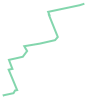

In [33]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [34]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges.crs, columns=['geometry'])

# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

C:\Anaconda3\envs\uoft\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


geometry  \
0  LINESTRING (-79.39411 43.66513, -79.39433 43.6...   

                                              osmids  length_m  
0  [390545921, 60654129, 60654119, 389678001, 389...   0.00841

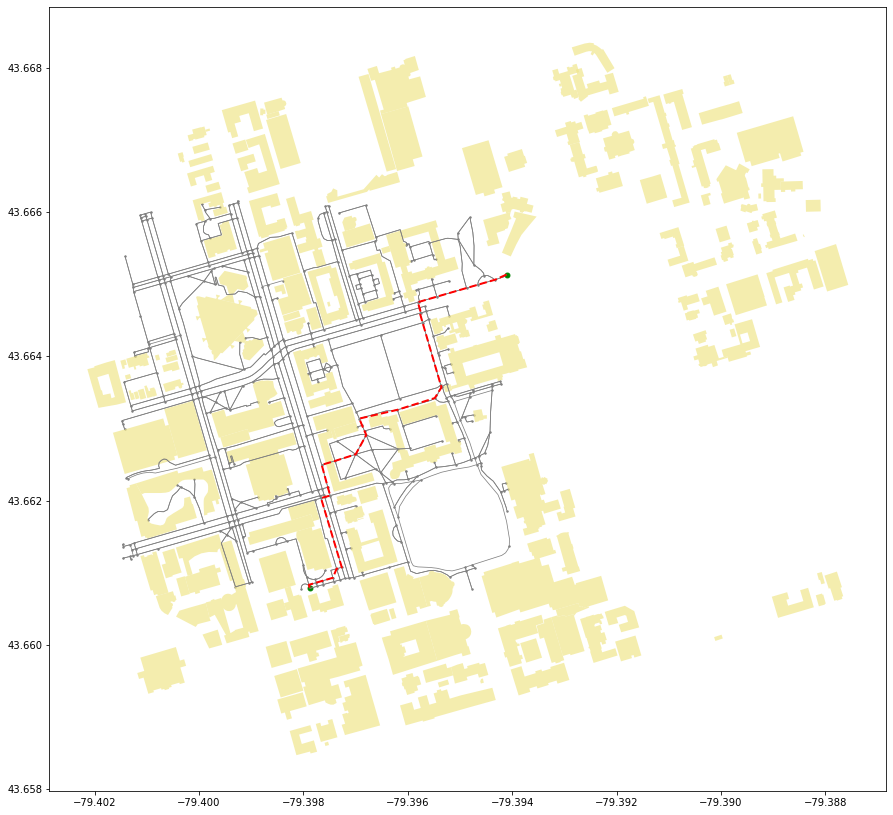

In [35]:
# Plot edges and nodes
ax = edges.plot(linewidth=0.75, color='gray', figsize=(15,15))
ax = nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=24, color='green')

## Finding points of interest (POIs) using overpass-api

In [36]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(node["amenity"="restaurant"](around:1000,43.66, -79.39);
 way["amenity"="restaurant"](around:1000,43.66, -79.39);
 rel["amenity"="restaurant"](around:1000,43.66, -79.39);

);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
restaurant = response.json()

In [37]:
len(restaurant['elements'])

196

In [38]:
# Extract the lon, lat and name of each restaurant:
lons = []
lats = []
text = []
for elem in restaurant['elements']:
    if elem['type'] == 'node':
        lons.append(elem['lon'])
        lats.append(elem['lat'])
        
    elif 'center' in elem:
        lons.append(elem['center']['lon'])
        lats.append(elem['center']['lat'])  
    else: pass
    if 'name'  not in elem['tags']:
        text.append('Noname')
    else:
        text.append(elem['tags']['name'])

In [39]:
restaurants = dict(type='scattermapbox',
                   lat=lats, 
                   lon=lons,
                   mode='markers',
                   text=text,
                   marker=dict(size=8, color='blue'),
                   hoverinfo='text',    
                   showlegend=False)

In [40]:
# plotting restaurants' locations around University of Toronto
import plotly.graph_objects as obj

center=(43.662643, -79.395689) # UofT main building


fig = obj.Figure(obj.Scattermapbox(restaurants))

# defining plot layout
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, mapbox = {'center': {'lat': center[0], 'lon': center[1]}, 'zoom': 13})
fig.show()